In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
import gurobipy as gp
import matplotlib.pyplot as plt
import torch
import time
import pickle


import runner
import agent

from graph import Graph
from baselines import BSSRPMIP
from baselines import NearestNeighboursHeuristic

from environment import Environment

from utils.evaluation_utils import *

In [3]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#devide = torch.device("cpu")

In [4]:
m = gp.Model()

Set parameter Username


2021-12-01 08:51:23,809:INFO:Set parameter Username


Academic license - for non-commercial use only - expires 2022-01-29


2021-12-01 08:51:23,811:INFO:Academic license - for non-commercial use only - expires 2022-01-29


### Generate Graph

In [5]:
seed = 12343

In [6]:
use_penalties = True
no_bikes_leaving = True

In [7]:
num_nodes = 20
num_vehicles = 3
time_limit = 45

k_nn = 10

max_load = 20
max_demand = 9

penalty_cost_demand = 5
penalty_cost_time = 5
bike_load_time = 0

fixed_bikes_leaving = True
starting_fraction = 0.5

speed = 30 

In [8]:
g = Graph(
        num_nodes = num_nodes, 
        k_nn = k_nn, 
        num_vehicles = num_vehicles,
        penalty_cost_demand = penalty_cost_demand,
        penalty_cost_time = penalty_cost_time, 
        starting_fraction=starting_fraction,
        speed = speed,
        bike_load_time=bike_load_time,
        time_limit = time_limit)

#### Model Parameters

In [10]:
agent_path = '../trained_models/model_20_node.pt'

rl_agent = agent.Agent('GATv2', 0, 1, 1000)
rl_agent.load_model(agent_path)

rl_agent.epsilon_ = 0.0
rl_agent.epsilon_min = 0.0
rl_agent.cpu()

#rl_agent = None

rl_agent

In [11]:
mip_params = {
    "use_penalties" : True,
    "fixed_bikes_leaving" : True,
    "silent" : True,
    "solver_time_limit" : 120,
    "solver_gap_limit" : 0.01,
    "visit_all" : True,
}

### Evaluate

In [10]:
n_instances = 100

In [11]:
results = evaluate(g, n_instances, seed, rl_agent, mip_params, freq=1)

Instance: 1/100
Instance: 2/100
Instance: 3/100
Instance: 4/100
Instance: 5/100
Instance: 6/100
Instance: 7/100
Instance: 8/100
Instance: 9/100
Instance: 10/100
Instance: 11/100
Instance: 12/100
Instance: 13/100
Instance: 14/100
Instance: 15/100
Instance: 16/100
Instance: 17/100
Instance: 18/100
Instance: 19/100
Instance: 20/100
Instance: 21/100
Instance: 22/100
Instance: 23/100
Instance: 24/100
Instance: 25/100
Instance: 26/100
Instance: 27/100
Instance: 28/100
Instance: 29/100
Instance: 30/100
Instance: 31/100
Instance: 32/100
Instance: 33/100
Instance: 34/100
Instance: 35/100
Instance: 36/100
Instance: 37/100
Instance: 38/100
Instance: 39/100
Instance: 40/100
Instance: 41/100
Instance: 42/100
Instance: 43/100
Instance: 44/100
Instance: 45/100
Instance: 46/100
Instance: 47/100
Instance: 48/100
Instance: 49/100
Instance: 50/100
Instance: 51/100
Instance: 52/100
Instance: 53/100
Instance: 54/100
Instance: 55/100
Instance: 56/100
Instance: 57/100
Instance: 58/100
Instance: 59/100
Instan

In [12]:
print_results(results)

Reward:
  MIP:  -123.66223596036434 
  NN:   -272.79029935598373 
  RL:   -381.3183680725342 
Solving Time:
  MIP:  46.52320045471191 
  NN:   0.00024013280868530275 
  RL:   0.0474904990196228 


In [13]:
get_reward_stats(results)

MIP Rewards:
  Reward Type  | Mean               | std               
  --------------------------------------------
  Tour:        | -112.96536277977198   | 18.193302680498242          
  Demands:     | -1.600000023841858 | 4.176122665405273
  Overage:     | -9.096872939168222 | 15.103019730320717 

NN Rewards:
  Reward Type  | Mean               | std               
  --------------------------------------------
  Tour:        | -141.05209758541778   | 16.895495104167658          
  Demands:     | -61.20000076293945 | 30.307754516601562
  Overage:     | -70.53820050459298 | 46.40826832830135 

RL Rewards:
  Reward Type  | Mean               | std               
  --------------------------------------------
  Tour:        | -96.15364016948739   | 12.78980552356417          
  Demands:     | -66.4000015258789 | 42.76727294921875
  Overage:     | -218.76472801879407 | 63.04276944676574 



In [14]:
get_optimality_gaps(results, n_instances, rl_agent)

  Method      | Gap  (%)            
  ----------------------------------
  MIP:        | 0.0 
  NN:         | 122.4972609073451 
  RL:         | 214.54052249288551 


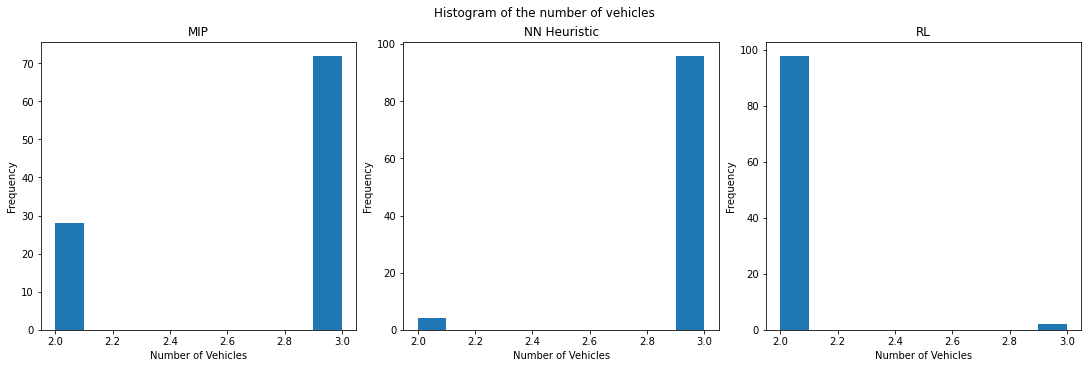

In [15]:
plot_num_routes(results, rl_agent)

### Render

In [12]:
seed = 123
save_path = f'../rl_results/' 

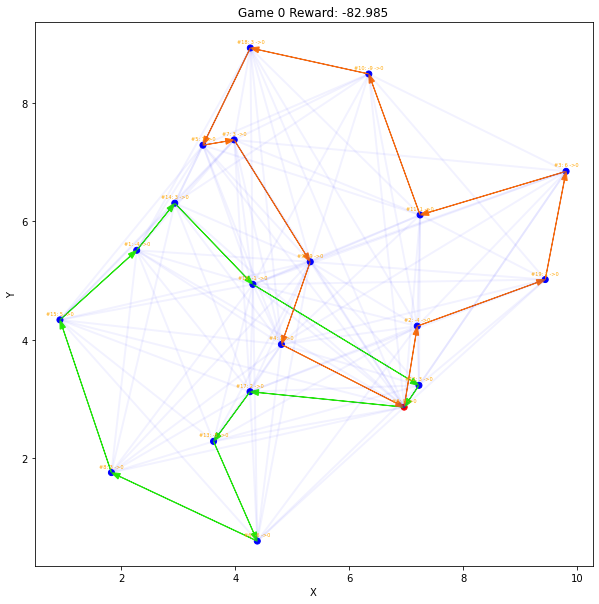

In [13]:
render_mip(g, seed, mip_params, save_path + f"render_mip_n{num_nodes}_s{seed}.jpg")

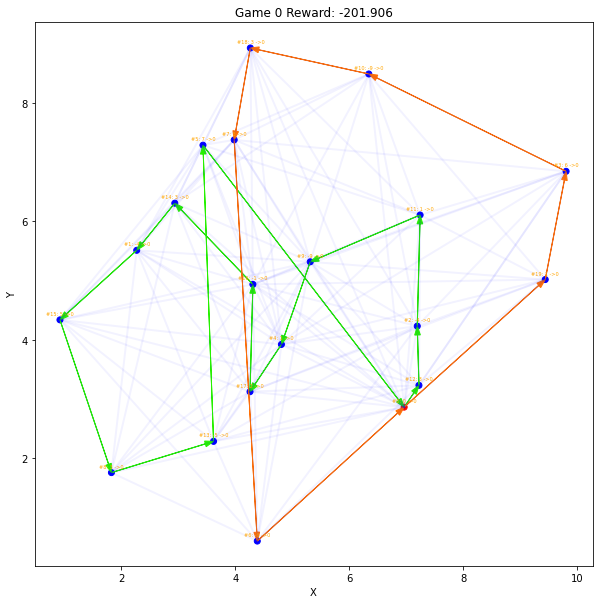

In [14]:
render_nn(g, seed, mip_params, save_path + f"render_nn_n{num_nodes}_s{seed}.jpg")

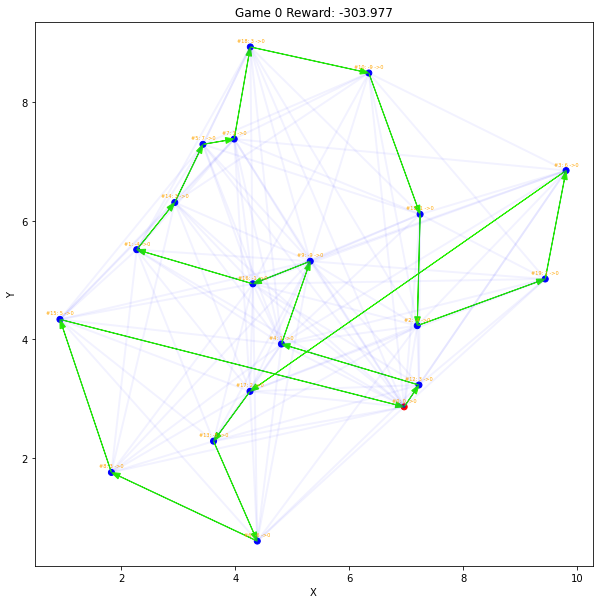

In [15]:
render_rl(g, seed, rl_agent, save_path + f"render_rl_n{num_nodes}_s{seed}.jpg")

### Save Results

In [27]:
with open(f'../evaluation_results/{num_nodes}_nodes.pickle', 'wb') as p:
    pickle.dump(results, p)